In [159]:
# Generating a toy dataset.
# DO NOT MODIFY THIS PART

import numpy as np
import math
import random as rand

paras = list((rand.random() - 0.5 for _ in range(13)))

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def y_gen(x):
    h_11 = sigmoid(paras[0] * x[0] + paras[1] * x[1] + paras[2])
    h_12 = sigmoid(paras[3] * x[0] + paras[4] * x[1] + paras[5])
    h_13 = sigmoid(paras[6] * x[0] + paras[7] * x[1] + paras[8])
    h_21 = sigmoid(paras[9] * h_11 + paras[10] * h_12 + paras[11] * h_13 + paras[12])
    return h_21 + ((rand.random()-0.5)/100 if rand.random()>0.6 else 0)

n = 300
x = list(zip((rand.random() - 0.5 for _ in range(n)), (rand.random() - 0.5 for _ in range(n))))
y = list(map(y_gen, x))
y = [(i-min(y))/(max(y)-min(y)) for i in y]

from sklearn.model_selection import train_test_split

r = 0.2
x_train_valid, x_test, y_train_valid, y_test = train_test_split(x, y, test_size=r)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_valid, y_train_valid, test_size=r)

In [160]:
import numpy as np
def sigmoid_derivative(a):
    return a * (1 - a)

In [161]:
import numpy as np
input_size = 2
hidden_size = 3
output_size = 1
def initialize_parameters():
    np.random.seed(1)  # For reproducibility and consistent results

    W1 = np.random.randn(input_size, hidden_size)
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, output_size)
    b2 = np.zeros((1, output_size))

    return parameters

In [162]:
def forward_propagation(X, parameters):
    W1, b1, W2, b2 = parameters['W1'], parameters['b1'], parameters['W2'], parameters['b2']
    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    cache = {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2}
    return A2, cache

In [163]:
def compute_mse_loss(A2, Y):
    m = Y.shape[1]
    cost = np.sum((A2 - Y) ** 2) / (2 * m)
    return cost

In [164]:
def backward_propagation(parameters, cache, X, Y):
    m = Y.shape[1]
    W2 = parameters['W2']
    
    A1 = cache['A1']
    A2 = cache['A2']
    
    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m
    dZ1 = np.dot(W2.T, dZ2) * A1 * (1 - A1)
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m
    
    grads = {'dW1': dW1, 'db1': db1, 'dW2': dW2, 'db2': db2}
    return grads

In [165]:
def update_parameters(parameters, grads, learning_rate):
    parameters['W1'] -= learning_rate * grads['dW1']
    parameters['b1'] -= learning_rate * grads['db1']
    parameters['W2'] -= learning_rate * grads['dW2']
    parameters['b2'] -= learning_rate * grads['db2']
    return parameters

Epoch 1/100, Train Cost: 0.009696845771751717, Valid Cost: 0.010856106135562999
Epoch 2/100, Train Cost: 0.009691508294791982, Valid Cost: 0.010860306744284436
Epoch 3/100, Train Cost: 0.009686355601493902, Valid Cost: 0.01086450183211726
Epoch 4/100, Train Cost: 0.009681380411262703, Valid Cost: 0.010868687401431579
Epoch 5/100, Train Cost: 0.009676575685281017, Valid Cost: 0.010872859677209861
Epoch 6/100, Train Cost: 0.009671934621695728, Valid Cost: 0.010877015100203623
Epoch 7/100, Train Cost: 0.009667450650657935, Valid Cost: 0.010881150320079235
Epoch 8/100, Train Cost: 0.009663117429240267, Valid Cost: 0.010885262188571887
Epoch 9/100, Train Cost: 0.00965892883625416, Valid Cost: 0.010889347752665233
Epoch 10/100, Train Cost: 0.00965487896698813, Valid Cost: 0.010893404247813081
Epoch 11/100, Train Cost: 0.009650962127886674, Valid Cost: 0.010897429091217459
Epoch 12/100, Train Cost: 0.009647172831187935, Valid Cost: 0.010901419875176701
Epoch 13/100, Train Cost: 0.009643505789

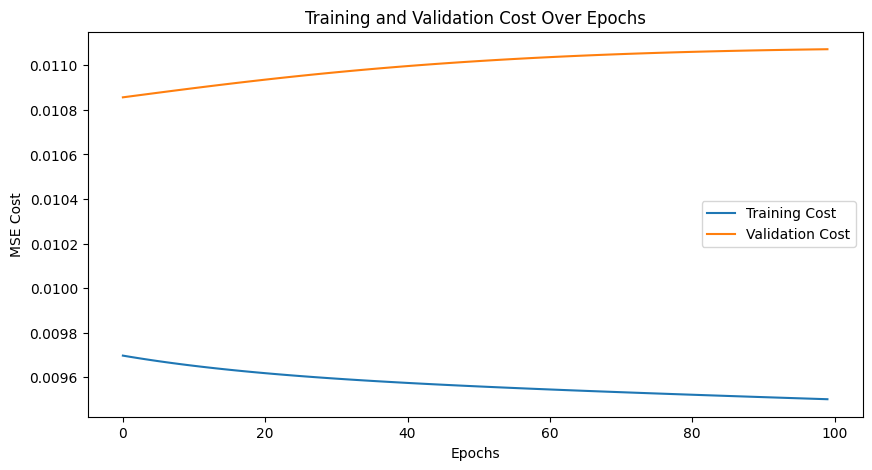

In [166]:
import matplotlib.pyplot as plt
import numpy as np
def train_model_sgd(X_train, Y_train, X_valid, Y_valid, epochs, learning_rate):
    parameters = initialize_parameters()
    train_costs = []
    valid_costs = []

    for epoch in range(epochs):
        for i in range(X_train.shape[1]):
            X_i = X_train[:, [i]]
            Y_i = Y_train[:, [i]]
            A2, cache = forward_propagation(X_i, parameters)
            grads = backward_propagation(parameters, cache, X_i, Y_i)
            parameters = update_parameters(parameters, grads, learning_rate)
        
        # Compute training and validation costs after each epoch
        A2_train, _ = forward_propagation(X_train, parameters)
        train_cost = compute_mse_loss(A2_train, Y_train)
        A2_valid, _ = forward_propagation(X_valid, parameters)
        valid_cost = compute_mse_loss(A2_valid, Y_valid)
        train_costs.append(train_cost)
        valid_costs.append(valid_cost)

        print(f"Epoch {epoch+1}/{epochs}, Train Cost: {train_cost}, Valid Cost: {valid_cost}")
    
    # Plot costs
    plt.figure(figsize=(10, 5))
    plt.plot(train_costs, label='Training Cost')
    plt.plot(valid_costs, label='Validation Cost')
    plt.xlabel('Epochs')
    plt.ylabel('MSE Cost')
    plt.title('Training and Validation Cost Over Epochs')
    plt.legend()
    plt.show()

    return parameters

# Parameters for the training process
epochs = 100
learning_rate = 0.01

# Train the model
parameters = train_model_sgd(X_train, Y_train, X_valid, Y_valid, epochs, learning_rate)